In [21]:
# Import pustaka yang diperlukan
import pandas as pd
from IPython.display import display

# Membaca data dari file Excel
file_path = 'data.xlsx'
df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama data untuk verifikasi
print("Basis Pengetahuan:")
display(df.head())


Basis Pengetahuan:


,Nama Penyakit,Gejala,Bobot Gejala,Importance Penyakit
0,Karat Daun Kopi,Bercak kuning pada daun,0.8,0.9
1,Karat Daun Kopi,Tepung oranye di bawah daun,0.7,0.9
2,Karat Daun Kopi,Daun gugur,0.9,0.9
3,Karat Daun Kopi,Daun mengering,0.8,0.9
4,Karat Daun Kopi,Bercak cokelat bergabung membentuk\narea besar,0.8,0.9


In [23]:
def get_mass(df, disease):
    mass = {}
    filtered_df = df[df['Nama Penyakit'] == disease]
    for index, row in filtered_df.iterrows():
        symptom = row['Gejala']
        weight = row['Bobot Gejala']
        mass[symptom] = weight
    return mass

def combine_beliefs(mass1, mass2):
    combined_mass = {}
    for s1, m1 in mass1.items():
        for s2, m2 in mass2.items():
            if s1 == s2:
                combined_mass[s1] = combined_mass.get(s1, 0) + m1 * m2
            else:
                combined_mass[s1 + '|' + s2] = combined_mass.get(s1 + '|' + s2, 0) + m1 * m2

    # Normalisasi
    total_mass = sum(combined_mass.values())
    normalized_mass = {k: v / total_mass for k, v in combined_mass.items()}
    return normalized_mass

print("Fungsi Dumpster Shafer telah di Load")


Fungsi Dumpster Shafer telah di Load


In [30]:
import json


# Langkah 3: Membaca Data Dummy Gejala dari JSON
dummy_json_path = 'dummy_samples.json'
with open(dummy_json_path, 'r') as f:
    dummy_samples_json = json.load(f)

# Menampilkan beberapa data dalam bentuk tabel
sample_df_list = []
for i, sample in enumerate(dummy_samples_json[:5]):  # Hanya menampilkan 5 sampel pertama untuk contoh
    sample_df = pd.DataFrame(sample)
    sample_df['Sample'] = f'Sample {i+1}'
    sample_df_list.append(sample_df)

combined_sample_df = pd.concat(sample_df_list, ignore_index=True)
display(combined_sample_df)


,Gejala,Probabilitas,Sample
0,Bercak kuning pada daun,0.6,Sample 1
1,Daun gugur,0.5,Sample 1
2,Pucuk menghitam,0.7,Sample 2
3,Tepung oranye di bawah daun,0.4,Sample 2
4,Daun mengering,0.8,Sample 3
5,Buah pecah,0.6,Sample 3
6,Bercak hitam pada buah,0.5,Sample 4
7,Penyebaran bercak yang cepat pada buah,0.7,Sample 4
8,Akar menghitam,0.6,Sample 5
9,Tanaman layu,0.5,Sample 5


In [33]:
# Import pustaka yang diperlukan
import pandas as pd
from IPython.display import display

# Langkah 4: Menghitung Kemungkinan Penyakit Berdasarkan Gejala
def calculate_mass_functions(dummy_symptoms, df):
    masses = []
    for symptom in dummy_symptoms:
        gejala = symptom['Gejala']
        probability = symptom['Probabilitas']
        symptom_mass = df[df['Gejala'] == gejala][['Nama Penyakit', 'Bobot Gejala', 'Importance Penyakit']]
        if not symptom_mass.empty:
            symptom_mass['Mass'] = symptom_mass['Bobot Gejala'] * probability
            masses.append(symptom_mass)
    return masses

# Proses setiap sampel dalam loop
results = []
for i, sample in enumerate(dummy_samples_json):
    masses = calculate_mass_functions(sample, df)
    combined_mass = {}
    for j, mass in enumerate(masses):
        mass_dict = dict(zip(mass['Nama Penyakit'], mass['Mass']))
        if j == 0:
            combined_mass = mass_dict
        else:
            combined_mass = combine_beliefs(combined_mass, mass_dict)
    results.append(combined_mass)

# Menampilkan hasil dalam bentuk tabel
result_rows = []
for i, combined_mass in enumerate(results):
    if combined_mass:  # Periksa apakah combined_mass tidak kosong
        max_belief = max(combined_mass, key=combined_mass.get)
        max_prob = combined_mass[max_belief] * 100
        result_rows.append({'Sample': f'Sample {i+1}', 'Penyakit': max_belief, 'Probabilitas (%)': max_prob})
    else:
        result_rows.append({'Sample': f'Sample {i+1}', 'Penyakit': 'Tidak Diketahui', 'Probabilitas (%)': 0})

final_result_df = pd.DataFrame(result_rows)
display(final_result_df)


,Sample,Penyakit,Probabilitas (%)
0,Sample 1,Karat Daun Kopi,100.000000
1,Sample 2,Penyakit Ceri Kopi|Karat Daun Kopi,100.000000
2,Sample 3,Karat Daun Kopi|Penyakit Ceri Kopi,20.512821
3,Sample 4,Penyakit Ceri Kopi,35.000000
4,Sample 5,Penyakit Akar Hitam|Penyakit Akar Merah,14.545455
5,Sample 6,Penyakit Mata Anjing|Penyakit Akar Merah,0.865333
6,Sample 7,Penyakit Busuk Buah,100.000000
7,Sample 8,Penyakit Embun Tepung|Penyakit Mata Anjing,9.302326
8,Sample 9,Penyakit Busuk Leher|Penyakit Akar Merah,14.545455
9,Sample 10,Penyakit Busuk Pangkal Batang|Penyakit Mata ...,9.302326


In [39]:
# Menampilkan hasil dalam bentuk tabel
result_rows = []
for i, combined_mass in enumerate(results):
    if combined_mass:  # Periksa apakah combined_mass tidak kosong
        max_belief = max(combined_mass, key=combined_mass.get)
        max_prob = combined_mass[max_belief] * 100
        result_rows.append({'Sample': f'Sample {i+1}', 'Penyakit': max_belief, 'Probabilitas (%)': max_prob})
    else:
        result_rows.append({'Sample': f'Sample {i+1}', 'Penyakit': 'Tidak Diketahui', 'Probabilitas (%)': 0})

final_result_df = pd.DataFrame(result_rows)
# Menghitung frekuensi penyakit
frequency_df = final_result_df['Penyakit'].value_counts().reset_index()
frequency_df.columns = ['Penyakit', 'Frekuensi']

# Menghitung persentase frekuensi penyakit
total_samples = len(final_result_df)
frequency_df['Persentase (%)'] = (frequency_df['Frekuensi'] / total_samples) * 100

display(frequency_df)

,Penyakit,Frekuensi,Persentase (%)
0,Penyakit Ceri Kopi|Karat Daun Kopi,2,10.0
1,Karat Daun Kopi|Penyakit Ceri Kopi,2,10.0
2,Penyakit Ceri Kopi,2,10.0
3,Penyakit Akar Hitam|Penyakit Akar Merah,2,10.0
4,Penyakit Mata Anjing|Penyakit Akar Merah,2,10.0
5,Penyakit Busuk Buah,2,10.0
6,Penyakit Embun Tepung|Penyakit Mata Anjing,2,10.0
7,Penyakit Busuk Leher|Penyakit Akar Merah,2,10.0
8,Penyakit Busuk Pangkal Batang|Penyakit Mata ...,2,10.0
9,Karat Daun Kopi,1,5.0


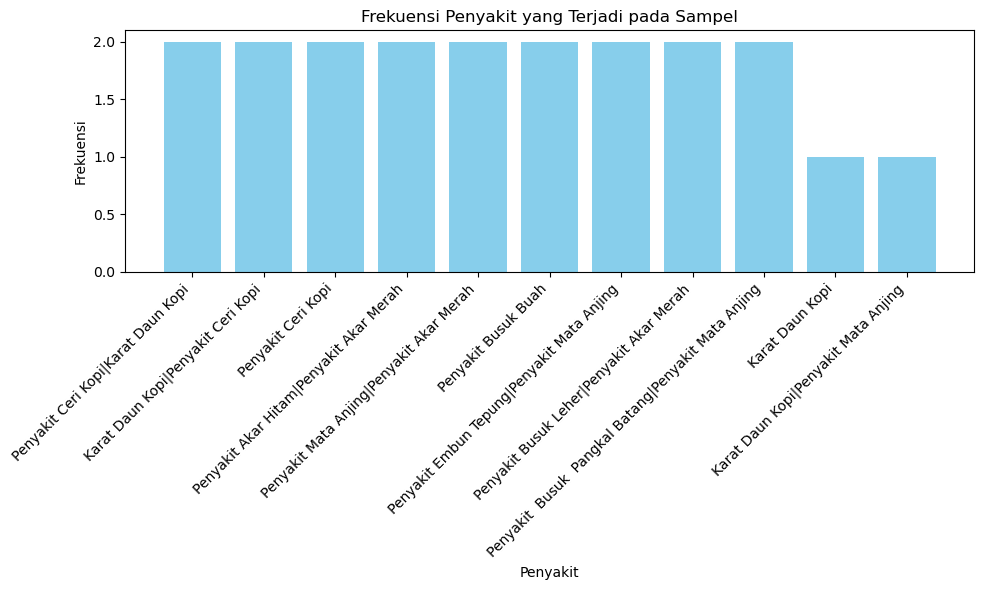

In [41]:
# Visualisasi frekuensi penyakit
plt.figure(figsize=(10, 6))
plt.bar(frequency_df['Penyakit'], frequency_df['Frekuensi'], color='skyblue')
plt.xlabel('Penyakit')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Penyakit yang Terjadi pada Sampel')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()